# STA 663 Final Project
### —Biclustering via Sparse Singular Value Decomposition

Yanqin Shen: abstract, algrithm optimization, algorithm comparison, discussion, package installation <br>
Gaojia Xu: Background, Description of algorithm, initial algorithm implementation, real data set application, algorithm comparison <br>
Nancy Fu: Background, Description of algorithm, initial algorithm implementation, simulated data application,algorithm comparison, discussion

# Python implementation of Biclustering through SSVD

# 1. Abstract

Sparse singular value decomposition (SSVD) is a tool for biclustering and seeks a low-rank matrix approximation to the orginal data matrices. It imposes sparsity regularization penalities to the least squares regression to obtain the sparse singular vectors. It uses BIC criterion to find the best parameters for the penalities and iterates to find the decomposition result until convergence. To optimize the algorithm, we use parallalism and JOT compiler. We test the algorithm on simulated data, lung cancer data and Brain Cancer Data. Finally, we compared SSVD with SVD and sparse PCA.

$ \boldsymbol {Key Phrases: Biclustering; Sparse SVD; SVD; PCA.}$ 

# 2.Background

Nowadays, high dimensional datasets has become common and inevitable in various applications. In some situations, people are having high-dimension low sample size (HDLSS) data. To deal with this kind of dataset, we can use biclustering method as an important unsupervised learning tool. It simultaneously identify distinctive "checkerboard" patterns in data matrices. In the paper we used, named Biclustering via Sparse Singular Value Decomposition by Mihee Lee, Haipeng Shen, Jianhua Z. Huang, and J. S. Marron., Sparse Singular Value Decomposition (SSVD) is introduced as a new tool for biclustering.

Performing SSVD allows us find out the sparse structure for both directions in the datasets. It is useful in different fields, such as in biological data analysis, data mining, medical applications and so on. Because there is no closed form solution, the algorithm iteratively updates associated parameters until converge.

# 3. Description of algorithm

Firstly, the algorithm of Sparse Singular Value Decomposition (SSVD) provides the rank-k decomposition matrix to the original data matrix, which can be interpreted as the summation of k SSVD layers. Then it is possible obtain the current first layer step by step, subsequent layer can be obtained by the same method from the residual matrix after the previous layer. The top layer can be obtained based on the penlaized sum-of-squares criterion in which the degree of sparsity of each iteration is selected based on BIC. The following algorithm only outpus the top layer and weight parameters $\gamma_1, \gamma_2$ are fixed to be 2.

### Step 1. Initialize $u$, $s$, $v$

Apply the standard SVD to $X$, which returns $U$, $S$, and $V^T$ whose dimensions are $n*d$, $1*d$, and $d*d$. <br>

Since the first SVD layer $s_1 u_1 v_1^T$ is the best rank-one matrix approximation of $X$ under the Frobenius norm, denote the first SVD triplet as the first vector in $U$, $S$, and $V^T$ and name those $\{u_{old}, s_{old}, v_{old}\}$.


### Step 2. Update $u$, $v$


#### 2.(a) update $v$.

1. For each possible $\lambda_v$ in specified range: calculate its $BIC$, where $BIC(\lambda_v) = \frac{||Y-\hat{Y}||^2}{nd\cdot \hat{\sigma_v^2}} + \frac{log(nd)}{nd}\hat{df}(\lambda_v)$,

where $\hat{df}(\lambda_v)$ is the degree of sparsity of $v$, defined by the number of $(X^T u)_j$s theta are greater than $\lambda_v w_{v,j}/2$,

$\hat{\sigma_v^2}$ is the OLS estimate of the error variance from the model $||X - u\tilde{v}||_F^2 + \lambda_v P_2(\tilde{v})$, where $\tilde{v} = sv$.

2. Pick the best $\lambda_v$ which minimizes $BIC(\lambda_v)$ as the penalty parameter.


3. Set $\tilde v_j = sign{(X^T u_{old})_j}(|(X^T u_{old})_j|-\lambda_v w_{2,j}/2)_{+}$, $\{j = 1, \cdots, d\}$, where $w_2 = |\hat{\tilde {v}}|^{-\gamma_2}$, $\hat{\tilde {v}} = X^Tu$


4. Let  $\tilde v = (\tilde v_1, ... , \tilde v_d)^T $, $v_{new} = \tilde v/||\tilde v_{new}||$


#### 2.(b) update $u$.

1. For each possible $\lambda_u$ in specified range: calculate its $BIC$, where $BIC(\lambda_u) = \frac{||Z-\hat{Z}||^2}{nd\cdot \hat{\sigma_u^2}} + \frac{log(nd)}{nd}\hat{df}(\lambda_u)$,

where $\hat{df}(\lambda_u)$ is the degree of sparsity of $v$, defined by the number of $(X^T v)_j$s theta are greater than $\lambda_u w_{u,j}/2$,

$\hat{\sigma_u^2}$ is the OLS estimate of the error variance from the model $||X - \tilde{u}v||_F^2 + \lambda_u P_2(\tilde{u})$, where $\tilde{u} = su$.

2. Pick the best $\lambda_u$ which minimizes $BIC(\lambda_u)$ as the penalty parameter.


3. Set $\tilde u_j = sign{(X^T v_{new})_i}(|(X^T v_{new})_i|-\lambda_u w_{1,j}/2)_{+}$, $\{i = 1, \cdots, n\}$, where $w_1 = |\hat{\tilde {u}}|^{-\gamma_1}$, $\hat{\tilde {u}} = X^Tv$


4. Let  $\tilde u = (\tilde u_1, ... , \tilde u_d)^T $, $u_{new} = \tilde u/||\tilde u_{new}||$


#### 2.(c) repeat
Set $u_{old}=u_{new}$, and repeat steps 2(a) and 2(b) until convergence, which means either the distance between $v_{new}$ and $v_{old}$ or that between $u_{new}$ and $u_{old}$ are smaller than a certain criteria $tol$.


### Step 3. Results

Set $u = u_{new}$ and $v = v_{new}$, $s=u_{new}^TXv_{new}$ at convergence.

### Note:

In $w_2$ and $w_1$, the zero entries in $X^Tv$ and $Xu$ can not be raised to negrative powers $-\gamma_1$ and $-\gamma_2$. Since when $X^Tv_j = 0$ or $Xu_j =0$, $w_{1,j} = (Xu_j)^{-gamma1}$ and $w_{2,j} = (X^Tv_j)^{-gamma2}$ will be infinity, we will replace the corresponding entries in $w$ with infinity and only calculate $w$ with the power otherwise.

# 4.Describe optimization for performance

## 4.1 initial algorithm implementation

Firstly, we implement the algorithm using plain Python from the above description of the algorithm. To test the dataset, we will use a simulated data with dimension (100,50). The explanation for simulate data costruction is in the next section.

In [2]:
import numpy as np
from numpy import linalg as la
from functools import partial
from joblib import Parallel,delayed
import numba
from numba import jit
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import SparsePCA
import pandas as pd
import seaborn as sns
import nltk

In [73]:
u_tilde = [[10],[9],[8],[7],[6],[5],[4],[3], [2]*17, [0]*75]
u_tilde = np.array(sum(u_tilde, [])).reshape((-1,1))
u_true = u_tilde / np.linalg.norm(u_tilde)

v_tilde = [[10],[-10],[8],[-8],[5],[-5],[3]*5,[-3]*5,[0]*34]
v_tilde = np.array(sum(v_tilde, [])).reshape((-1,1))
v_true = v_tilde / np.linalg.norm(v_tilde)

s_true = 50

X_star = s_true*u_true@v_true.T

#construct X with noise added
err = np.random.normal(0, 1, size=X_star.shape)

X = X_star + err
X.shape

(100, 50)

In [36]:
def SSVD(X, tol=1e-6, gamma1=2, gamma2=2, max_it = 100):
    """
    SSVD to obtain the first layer of matrix X 
    
    X = matrix to be decomposed
    tol = stopping criteria for convergence
    gamma = weight parameters
    max_it = maximum # of iterations
    
    * We will replace w with INF if corresponding entry in XTU/XV is zero
    """
    
    U, S, Vt = np.linalg.svd(X)
    n = X.shape[0]
    d = X.shape[1]
    
    S = S[0] 
    U = U[:,0].reshape((-1,1))
    V = Vt[0,:].reshape((-1,1))
    
    SST = np.sum(X**2)
    
    num_it = 0
    V_delta, U_delta = 1000, 1000
    
    while (V_delta > tol) or (U_delta > tol) or (num_it > max_it):
        
        num_it += 1
        
        ### UPDATE V ###

        XTu = X.T @ U             
        '''Since zero cannot be raised to power, we will replace w whose index in XTu is zero with Inf'''
        replaced_XTu = np.ravel(abs(XTu))
        nonzero_ind = (replaced_XTu > 1e-4)
        zero_ind = (replaced_XTu <= 1e-4)
        
        w2 = np.zeros(d)
        w2[nonzero_ind] = replaced_XTu[nonzero_ind] ** (-gamma2)  
        w2[zero_ind] = np.Inf
        
        sig_sq = np.trace((X-S*U@V.T) @ (X-S*U@V.T).T)/(n*d-d)

        # calculate BIC and find best lambda for current V

        lambda2s = np.linspace(0, 12, 5000)[1:]
        BICs = np.zeros(len(lambda2s))

        for i in range(len(lambda2s)):
            lamb2 = lambda2s[i]
            X_hat = U * S @ V.T
    
            # given current lambda, count df & calculate BIC
            dfV_hat = np.sum(abs(XTu) > lamb2 * w2/2) # number of entries that satify abs(XTu) > lamb2 * w2/2
            BICs[i] = np.sum((X - X_hat)**2) /(n*d * sig_sq) + np.log(n*d)/(n*d) * dfV_hat
        opt_lamb2 = lambda2s[np.argmin(BICs)]

        # for best lambda, calculate v_tilde

        V_tilde = np.zeros((d, 1))
        for j in range(d):
            XTu_j = XTu[j]
            V_tilde[j] = np.sign(XTu_j) * np.maximum(abs(XTu_j) - opt_lamb2 * w2[j]/2, 0)

        # new V

        V_new = V_tilde / np.sqrt(np.sum(V_tilde**2))
        V_delta = np.sqrt(np.sum((V - V_new)**2))
        V = V_new



        ### UPDATE U ###

        Xv = X @ V
        '''Since zero cannot be raised to power, we will replace w whose index in XTu is zero with Inf'''
        replaced_Xv = np.ravel(abs(Xv))
        nonzero_ind = (replaced_Xv > 1e-4)
        zero_ind = (replaced_Xv <= 1e-4)
        
        w1 = np.zeros(n)
        w1[nonzero_ind] = replaced_Xv[nonzero_ind] ** (-gamma1)  
        w1[zero_ind] = np.Inf

        sig_sq = np.trace((X-S*U@V.T) @ (X-S*U@V.T).T)/(n*d-d)

        # calculate BIC and find best lambda for current U

        lambda1s = np.linspace(0, 12, 5000)[1:]
        BICs = np.zeros(len(lambda1s))

        for i in range(len(lambda1s)):
            lamb1 = lambda1s[i]
            X_hat = U * S @ V.T
    
            # given current lambda, count df & calculate BIC
            dfU_hat = np.sum(abs(Xv) > lamb1 * w1/2) # number of entries that satify abs(Xv) > lamb1 * w1/2
            BICs[i] = np.sum((X - X_hat)**2) /(n*d * sig_sq) + np.log(n*d)/(n*d) * dfU_hat
        opt_lamb1 = lambda1s[np.argmin(BICs)]

        # for best lambda, calculate u_tilde

        U_tilde = np.zeros((n, 1))
        for j in range(n):
            Xv_j = Xv[j]
            U_tilde[j] = np.sign(Xv_j) * np.maximum(abs(Xv_j) - opt_lamb1 * w1[j]/2, 0)

        #new U

        U_new = U_tilde / np.sqrt(np.sum(U_tilde**2)) #max(np.sum(abs(U_tilde), axis=0))
        U_delta = np.sqrt(np.sum((U - U_new)**2))
        U = U_new
        
        
    S = U.T @ X @ V
    
    # return non-zero entries of the sparse matrices
    return (np.ravel(U), 
            S,
            np.ravel(V), 
            num_it)

In [38]:
%timeit SSVD(X, tol=10**(-6), gamma1=2, gamma2=2, max_it = 100)

2.65 s ± 28.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We can see that it takes around 2.7s for the simulated data. Such speed is not satisfactory, so we want to optimize the algorithm by other methods.

## Parallelism by Parallel in joblib

In the function with plain Python, we can see that there are 4 for loops, 2 for getting BICS and 2 for calculating $\tilde v$ and $\tilde u$. We can try to accelarate the algorithm by using parallalism for these loops. Here, we use loop parallalism with `joblib`. Here, we use partial function from `functool` to allow us to do parallalism by only changing $\lambda$ for getting BICs and index for getting $\tilde v$ and $\tilde u$.

In [39]:
def get_BIC(lamb,X_old,w,X,X_hat,sig_sq,n,d):
    """
    To get BIC for updating u and v
    """
    df_hat = np.sum(abs(X_old > lamb * w/2))
    BIC = np.sum((X - X_hat)**2) /(n*d * sig_sq) + np.log(n*d)/(n*d) * df_hat        
    return BIC

def get_tilde(j, X_old, opt_lamb,w):
    """
    To get jth component of U_tilde and V_tilde
    """
    X_j = X_old[j]
    tilde = np.sign(X_j) * np.maximum(abs(X_j) - opt_lamb * w[j]/2, 0)
    return tilde

def SSVD_parallel(X, tol=1e-6, gamma1=2, gamma2=2, max_it = 100):
    
    """
    parallel version of SSVD to obtain the first layer of matrix X 
    
    X = matrix to be decomposed
    tol = stopping criteria for convergence
    gamma = weight parameters
    max_it = maximum # of iterations
    
    Return S,V,D and number of iterations
    """
    
    U, S, Vt = np.linalg.svd(X)
    n = X.shape[0]
    d = X.shape[1]
                    
    S = S[0] 
    U = U[:,0].reshape((-1,1))
    V = Vt[0,:].reshape((-1,1))
    
                    
    SST = np.sum(X**2)
    
    num_it = 0
    V_delta, U_delta = 1000, 1000
    
    while (V_delta > tol) or (U_delta > tol) or (num_it > max_it):
        
        num_it += 1
        
        ### UPDATE V ###

        XTu = X.T @ U             
        '''Since zero cannot be raised to power, we will replace the zeros in XTu with very small numbers'''
        replaced_XTu = np.ravel(abs(XTu))
        nonzero_ind = (replaced_XTu > 1e-4)
        zero_ind = (replaced_XTu <= 1e-4)
        
        w2 = np.zeros(d)
        w2[nonzero_ind] = replaced_XTu[nonzero_ind] ** (-gamma2)  
        w2[zero_ind] = np.Inf
        
        sig_sq = np.trace((X-S*U@V.T) @ (X-S*U@V.T).T)/(n*d-d)

        # calculate BIC and find best lambda for current V

        lambda2s = np.linspace(0, 12, 5000)[1:]
        X_hat = U * S @ V.T
        get_BIC_partial1 = partial(get_BIC, X_old = XTu,w = w2,X = X,X_hat = X_hat,sig_sq = sig_sq,n = n,d = d)
        BICs = Parallel(n_jobs = 4)(delayed(get_BIC_partial1)(i) for i in lambda2s)
        opt_lamb2 = lambda2s[np.argmin(BICs)]

        # for best lambda, calculate v_tilde
        
        get_tilde_partial1 = partial(get_tilde, X_old = XTu, opt_lamb = opt_lamb2, w = w2)
        V_tilde = np.array(Parallel(n_jobs = 4)(delayed(get_tilde_partial1)(i) for i in range(d)))

        # new V

        V_new = V_tilde / np.sqrt(np.sum(V_tilde**2)) #max(np.sum(abs(V_tilde), axis=0))
        V_delta = np.sqrt(np.sum((V - V_new)**2))
        V = V_new

        
        ### UPDATE U ###

        Xv = X @ V
        '''Since zero cannot be raised to power, we will replace the zeros in XTu with very small numbers'''
        replaced_Xv = np.ravel(abs(Xv))
        nonzero_ind = (replaced_Xv > 1e-4)
        zero_ind = (replaced_Xv <= 1e-4)
        
        w1 = np.zeros(n)
        w1[nonzero_ind] = replaced_Xv[nonzero_ind] ** (-gamma1)  
        w1[zero_ind] = np.Inf

        sig_sq = np.trace((X-S*U@V.T) @ (X-S*U@V.T).T)/(n*d-d)

        # calculate BIC and find best lambda for current U

        lambda1s = np.linspace(0, 12, 5000)[1:]
        X_hat = U * S @ V.T
        get_BIC_partial2 = partial(get_BIC, X_old = Xv,w = w1,X = X,X_hat = X_hat,sig_sq = sig_sq,n = n,d = d)
        BICs = Parallel(n_jobs = 4)(delayed(get_BIC_partial2)(i) for i in lambda1s)
        opt_lamb1 = lambda1s[np.argmin(BICs)]
        
        # for best lambda, calculate v_tilde
        
        get_tilde_partial2 = partial(get_tilde, X_old = Xv, opt_lamb = opt_lamb1, w = w1)
        U_tilde = np.array(Parallel(n_jobs = 4)(delayed(get_tilde_partial2)(i) for i in range(n)))

        #new V

        U_new = U_tilde / np.sqrt(np.sum(U_tilde**2)) #max(np.sum(abs(U_tilde), axis=0))
        U_delta = np.sqrt(np.sum((U - U_new)**2))
        U = U_new
        
        
    S = U.T @ X @ V
    
    # return non-zero entries of the sparse matrices
    return (np.ravel(U), 
            S,
            np.ravel(V), 
            num_it)

In [6]:
%timeit SSVD_parallel(X, tol=10**(-6), gamma1=2, gamma2=2, max_it = 100)

1.8 s ± 31.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Comparing the runnig time with algorithm in plain Python, it takes less time to use parallalism, but the performance does not improve too much. The reason may be that the cost of setting up worker processes outweigh the benefit from parallelism.

## 4.3 Numba

Then, we considered to use JIT compilation by `numba` to accelerate the algorithm. Since we have loops inside the algorithm, we will use parallel version.

Notes:
1. Since reshape(-1,1) to get column vectors is not working in numba, we use the exact dimension to replace -1.
2. Direct numpy indexing is not working in numba, so we instead used np.where.
3. Doing outproduct by @ is not workiing in numba, so we used np.outer.
4. The built-in abs function is not supported by numba, so we used abs function in `numpy`.

In [6]:
@jit (nopython = True, parallel = True)

def SSVD_numba(X, tol=1e-6, gamma1=2, gamma2=2, max_it = 100):
    
    """
    Numba version of SSVD to obtain the first layer of matrix X 
    
    X = matrix to be decomposed
    tol = stopping criteria for convergence
    gamma = weight parameters
    max_it = maximum # of iterations
    
    Return S,V,D and number of iterations
    """
    
    U, S, Vt = np.linalg.svd(X)
    n = X.shape[0]
    d = X.shape[1]
                    
    S = S[0] 
    U = U[:,0].reshape((n,1))
    V = Vt[:,0].reshape((d,1))
                    
    SST = np.sum(X**2)
    
    num_it = 0
    V_delta, U_delta = 1000, 1000
    
    while (V_delta > tol) or (U_delta > tol) or (num_it > max_it):
        
        num_it += 1
        
        ### UPDATE V ###

        XTu = np.dot(X.T, U)             
        '''Since zero cannot be raised to power, we will replace the zeros in XTu with very small numbers'''
        replaced_XTu = np.ravel(np.abs(XTu))
        nonzero_ind = (replaced_XTu > 1e-4)
        zero_ind = (replaced_XTu <= 1e-4)

        
        w2 = np.zeros(d)
        w2[nonzero_ind] = replaced_XTu[nonzero_ind] ** (-gamma2)  
        w2[zero_ind] = np.Inf    
        sig_sq = np.trace((X-S*np.outer(U,V)) @ (X-S*np.outer(U,V)).T)/(n*d-d)

        # calculate BIC and find best lambda for current V

        lambda2s = np.linspace(0, 12, 5000)[1:]
        BICs = np.zeros(len(lambda2s))
        X_hat = S * np.outer(U,V)

        for i in numba.prange(len(lambda2s)):
            lamb2 = lambda2s[i]

             #given current lambda, count df & calculate BIC
            dfV_hat = np.sum(np.abs(XTu) > lamb2 * w2/2) # number of rows that satify abs(XTu) > lamb2 * w2/2
            BICs[i] = np.sum((X - X_hat)**2) /(n*d * sig_sq) + np.log(n*d)/(n*d) * dfV_hat
        opt_lamb2 = lambda2s[np.argmin(BICs)]

         #for best lambda, calculate v_tilde

        V_tilde = np.zeros((d, 1))
        for j in numba.prange(d):
            XTu_j = XTu[j]
            V_tilde[j] = np.sign(XTu_j) * np.maximum(np.abs(XTu_j) - opt_lamb2 * w2[j]/2, 0)
    
         #new V

        V_new = V_tilde / np.sqrt(np.sum(V_tilde**2)) #max(np.sum(abs(V_tilde), axis=0))
        V_delta = np.sqrt(np.sum((V - V_new)**2))
        V = V_new

        
        ### UPDATE U ###

        Xv = np.dot(X, V)
        '''Since zero cannot be raised to power, we will replace the zeros in XTu with very small numbers'''
        replaced_Xv = np.ravel(np.abs(Xv))
        nonzero_ind = (replaced_Xv > 1e-4)
        zero_ind = (replaced_Xv <= 1e-4)
        
        w1 = np.zeros(n)
        w1[nonzero_ind] = replaced_Xv[nonzero_ind] ** (-gamma1)  
        w1[zero_ind] = np.Inf

        # calculate BIC and find best lambda for current U

        lambda1s = np.linspace(0, 12, 5000)[1:]
        BICs = np.zeros(len(lambda1s))
        X_hat = S * np.outer(U,V)

        for i in numba.prange(len(lambda1s)):
            lamb1 = lambda1s[i]
    
            # given current lambda, count df & calculate BIC
            dfU_hat =  np.sum(np.abs(Xv) > lamb1 * w1/2)# number of rows that satify abs(Xv) > lamb1 * w1/2
            BICs[i] = np.sum((X - X_hat)**2) /(n*d * sig_sq) + np.log(n*d)/(n*d) * dfU_hat
        opt_lamb1 = lambda1s[np.argmin(BICs)]

        # for best lambda, calculate v_tilde

        U_tilde = np.zeros((n, 1))
        for j in numba.prange(n):
            Xv_j = Xv[j]
            U_tilde[j] = np.sign(Xv_j) * np.maximum(np.abs(Xv_j) - opt_lamb1 * w1[j]/2, 0)

        #new V

        U_new = U_tilde / np.sqrt(np.sum(U_tilde**2)) #max(np.sum(abs(U_tilde), axis=0))
        U_delta = np.sqrt(np.sum((U - U_new)**2))
        U = U_new
        
        
        
    S = U.T @ X @ V
    
    # return non-zero entries of the sparse matrices
    return (np.ravel(U), 
            S,
            np.ravel(V), 
            num_it)

In [8]:
%timeit SSVD_numba(X, tol=10**(-6), gamma1=2, gamma2=2, max_it = 100)

85.4 ms ± 4.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We can see that comparing with previous algorithms, this algorithm is much faster. It takes advantage of parallalism and nonpython process.
Thus, the numba parallel version performs the fastest, so we will use the function `SSVD_numba` for further discussion.

# 5. Applications to simulated data sets

Based on the simulation section in the paper. $X^* = suv^T$ 

$\tilde{u} = [10,9,8,7,6,5,4,3,r(2,17),r(0,75)]^T$, $u=\tilde{u}/||\tilde{u}||$

$\tilde{v} = [10,-10,8,-8,5,-5,r(3,5),r(-3,5),r(0,34)]^T$, $v=\tilde{v}/||\tilde{v}||$

where $r(a,b)$ denotes a vector of length b, whose entries are all a.

Set $s=50$.

In [9]:
def get_plot(u, s, v, clusters, dismiss=0):
    """
    Get heat plot of clusters in rank 1 approximation.
    
    u, s, v = SSVD function output
    clusters = vector of predetermined groups
    dismiss = index discarded
    """
    
    X_star = s*u[:,None]@v[None,:]
    unique_clusters = np.unique(clusters)
    
    row_idx = np.empty(0, dtype = 'int')
    for i in range(len(unique_clusters)): #sort u by unique clusters
            idx = np.where(clusters == unique_clusters[i])
            clus_idx = idx[0][np.argsort(u[idx])]
            row_idx = np.concatenate((row_idx, clus_idx)) #update row index

    X = X_star[:,np.argsort(np.abs(v))[dismiss:]] 
    v_sort = v[np.argsort(np.abs(v))[dismiss:]] #smallest to largest absolute v (col structure of X)
    col_idx = np.argsort(v_sort) 
    
    sns.heatmap(X[np.ix_(row_idx, col_idx)], vmin=-1, vmax=1, cmap = 'bwr')

In [10]:
clusters = [[1]*10,[2]*15,[3]*75]
clusters = np.array(sum(clusters, []))

True data checkboard is shown below.

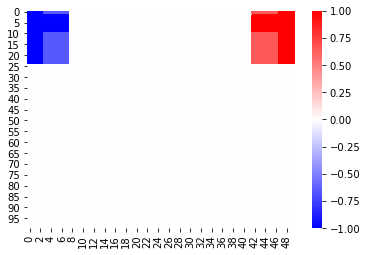

In [11]:
get_plot(u_true.reshape(-1), s_true, v_true.reshape(-1), clusters)

$X$ adds noise to $X_{true}$. The rank 1 approximation from normal SVD is shown below. We can see that the result is very different from the true result. There are less white regions than expected.

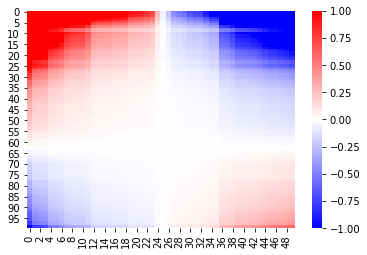

In [12]:
U, S, V = np.linalg.svd(X)
u = U.T[0]
v = V.T[0]
s = S[0]

get_plot(u.reshape(-1), s, v.reshape(-1), clusters)

The rank 1 approximation from defined SSVD is shown below, which is similar to true data checkboard. Thus, SSVD algorithms outperforms normal SVD for the simulated data. 

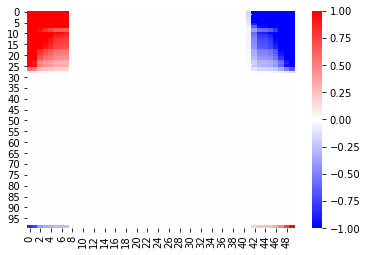

In [13]:
u, s, v, niter = SSVD_numba(X)
get_plot(u, s, v, clusters)

# 6.Applications to real data sets

## 6.1 Lung Cancer Data

From the paper, the author uses the Lung Cancer Data consists of expression levels of 12625 genes and 56 subjects. <br>

There are 4 subgroups of subjects: 
- First 20 are pulmonary carcinoid samples; 
- 20 to 33 are colon cancer samples; 
- 34 to 50 are normal lung samples; 
- 51 to 56 are small cell carcinoma samples.

In [49]:
LungData = pd.read_csv('LungCancerData.txt', sep=' ')
LungData = np.array(LungData.T) # 56 subjects
clusters = [[1]*20,[2]*(33-20),[3]*(50-33),[4]*(56-50)]
clusters = np.array(sum(clusters, []))

In [50]:
u, s, v, niter = SSVD_numba(LungData, tol=1e-6, gamma1=2, gamma2=2, max_it = 100)

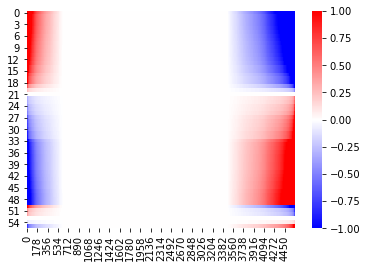

In [51]:
get_plot(u, s, v, clusters,8000)

In the plot, we discard the last 8000 genes. According to the plot, we can see that by rank1 approximation, there is a clear clustering result. For pulmonary carcinoid samples, genes from 0 to around 534 are positive and genes from around 2560 to the end are negative. For both colon cancer and normal lung samples, genes from 0 to around 534 are negative and genes from around 2560 to the end are positive. In general, the magnitudes for colon cancer samples is smaller than those for normal lung samples. The small cell carcinoma samples is split into two groups here.

## 6.2 Brain Cancer Data

It is the dataset obtained from kaggle website https://www.kaggle.com/michaelchalamet/brain-cancer-data, there are 1500 variables for different features and 4 types of cancers in total. 

Cancer Type 1 is Pituitary Adenoma, which has 122 observations, Type 2 is Germinoma with 247 samples, Type 3 is Meningiomas, which has 155 samples and Type 4 is Glioma, with 176 observations. We will only take the first 350 observations. Thus, in our dataset, we have 122 observations with Pituitary Adenoma and 128 observations with Germinoma.

In [3]:
df=pd.read_excel('BrainCancerData.xlsx')
labels=df.iloc[:,-1]
labels=np.array(labels)

df.drop('No.', inplace=True, axis=1)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df.shape

(700, 1500)

In [4]:
df = np.array(df.iloc[0:350,:])
labels = labels[0:350]

In [7]:
u, s, v, niter = SSVD_numba(df, tol=1e-6, gamma1=2, gamma2=2, max_it = 100)

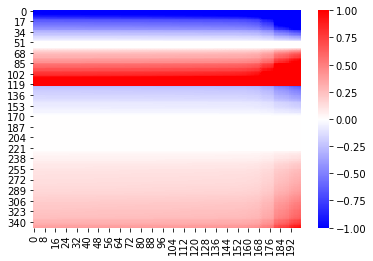

In [13]:
get_plot(u, s, v, labels,1300)

We can see for both groups with Pituitary Adenoma and Germinoma, we can see clear split for different clusters. Also, in general, the the magnitudes in the plot for observations in Germinoma is smaller than those for observations in Pituitary Adenoma. The result is not as satisfactory as the one in lung cancer data, but it still discovers some interesting results.

# 7.Comparative analysis with competing algorithms

In this section, we will compare the SSVD algorithm with two traditional methods to decompoase the matrix, which are normal SVD by `np.linalg.svd` and SPCA by `SparsePCA`. We will use the orginal algorithm for SSVD for to ensure stability in the iteration.

In [4]:
def check_accuracy(matrix, trueUorV, nsim):
    """
    Test accuracy of algorithms from simulated results
    
    matrix = simulated U/V by certain algorithm
    trueUorV = true U/V
    nsim = # of simulation tested
    
    Returns:
    Average # of zeros
    Average # of correctly identified zeros
    Average # of correctly identified nonzeros
    Misclassification rate
    """
    
    avg_num_zero = np.sum(matrix==0)/nsim 
    avg_num_corr_zero = np.sum((matrix==0) & (trueUorV==0))/nsim
    avg_num_corr_nonzero = np.sum((matrix!=0) & (trueUorV!=0))/nsim
    
    missc_rate = np.sum((matrix==0) != (trueUorV==0))/(nsim * len(trueUorV))
    
    return np.around([avg_num_zero,
                      avg_num_corr_zero, 
                      avg_num_corr_nonzero,
                      missc_rate], 
                     decimals=4)

In [7]:
def simulation_compare(U, S, V, nsim = 20):
    """
    Compare accuracy of 3 different algorithms based on simulation
    
    S = a positive scalar 1*1
    U = unit n-vector n*1
    V = unit d-vector d*1
    nsim = # of simulation tested
    """    
    X_star = S*U@V.T
    n, d = X_star.shape
    
    SSVD_U, SVD_U, SPCA_U = np.zeros((nsim, n)), np.zeros((nsim, n)), np.zeros((nsim, n))
    SSVD_V, SVD_V, SPCA_V = np.zeros((nsim, d)), np.zeros((nsim, d)), np.zeros((nsim, d))
    
    X_whole = np.zeros((n,d,nsim))
    for i in range(nsim):
        X_whole[:,:,i] = X_star + np.random.randn(n,d)
    
    for i in range(nsim):
        
        X = X_whole[:,:,i]
        
        # 1. SSVD
        SSVD_U[i,], S, SSVD_V[i,], nit = SSVD(X, tol=1e-6, gamma1=2, gamma2=2, max_it = 100)
        
        # 2. SVD
        SVD_u, S, SDV_vt = np.linalg.svd(X)
        SVD_U[i,] = SVD_u[:,0]
        SVD_V[i,] = SDV_vt[0,:]
        
        # 3. SPCA
        spca = SparsePCA(n_components=1)
        spca.fit(X)
        SPCA_V[i,] = spca.components_[0]
        spca.fit(X.T)
        SPCA_U[i,] = spca.components_[0]
        
    
    table = np.zeros((6, 4))
    i = 0
    for method in (SSVD_U, SSVD_V, SVD_U, SVD_V, SPCA_U, SPCA_V):
        if i%2==0:
            table[i,] = check_accuracy(method, np.ravel(U), nsim)
        else:
            table[i,] = check_accuracy(method, np.ravel(V), nsim)
        i += 1
    
    df = pd.DataFrame(table)
    df.columns = ['Average # of zeros', 
                  'Average # of correct zeros',
                  'Average # of correct nonzeros',
                  'Misclassification rate']
    df['Method'] = ['SSVD', 'SSVD','SVD', 'SVD','PCA','PCA']
    df['Vector'] = ['u', 'v']*3
            
            
    return df


In [10]:
simulation_compare(U=u_true, S=s_true, V=v_true, nsim = 50)

,Average # of zeros,Average # of correct zeros,Average # of correct nonzeros,Misclassification rate,Method,Vector
0,69.98,69.96,24.98,0.0506,SSVD,u
1,31.32,31.32,16.00,0.0536,SSVD,v
2,0.00,0.00,25.00,0.7500,SVD,u
3,0.00,0.00,16.00,0.6800,SVD,v
4,51.22,51.22,25.00,0.2378,PCA,u
5,23.10,23.10,16.00,0.2180,PCA,v


From the above dataframe, SSVD returns the largest average number of correct zeros/nonzeros and lowest misclassification rate compared to SVD and PCA. Thus, we can conclude SSVD has the highest accuracy among these three methods for demonstrating sparsity in high-dimension low sample size (HDLSS) data.

# 8. Discussion

The sparse singular value decomposition (SSVD) is a good tool for biclustering. It is beneficial to the data that is high-dimension low sample size (HDLSS). It takes advantage of adaptive lasso and BIC criterion and get a rank1 approximation. According the result of simulated and real-world data, SSVD can perform fast with small misclassification rates. SSVD can be applied to a lot of academic fields, including biomiedical application, text analysis and other classification problems with HDLSS settings. 

One of the limitation is that the algorithm does not specify the procedure of choosing lambdas' ranges. Since the result of SSVD depends on these choices, it would be better to find a way to accommodate the ranges according to the data in order to get more satisfactory results. 

# 9. Installation instruction

The github respository is here: https://github.com/yanqinshen/STA-663-project.

You can install the package by this command line: `pip install git+https://github.com/yanqinshen/STA-663-project.git@main`.

# 9. Reference

Lee, M., Shen, H., Huang, J., and Marron, J. (2010). Biclustering via sparse singular value decomposition. Biometrics 66, 1087-1095.